In [1]:
import numpy as np
import json
from PIL import Image, ImageDraw
import os
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [2]:
train_image_dir = "../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen"

image_paths_train = []

for i in os.listdir(train_image_dir):
    folder_path = os.path.join(train_image_dir, i)
    if i != '.DS_Store':
        image_paths_train.append(folder_path)

In [3]:
train_label_dir = "../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen"

label_paths_train = []

for i in os.listdir(train_label_dir):
    folder_path = os.path.join(train_label_dir, i)
    if i != '.DS_Store':
        label_paths_train.append(folder_path)

In [4]:
df_image_paths_train = pd.DataFrame({"Index": "", "Image_Path": image_paths_train})
df_label_paths_train = pd.DataFrame({"Index": "", "Target_Path": label_paths_train})

In [5]:
filter_instanceIds = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('instanceIds')]
filter_polygons = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('polygons')]
filter_labelIds = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('labelIds')]

df_label_paths_train = df_label_paths_train.drop(filter_instanceIds.index)
df_label_paths_train = df_label_paths_train.drop(filter_polygons.index)
df_label_paths_train = df_label_paths_train.drop(filter_labelIds.index)

In [6]:
index_tab = []
for el in df_image_paths_train['Image_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_leftImg8bit", "")
    index_tab.append(file_name)
df_image_paths_train['Index'] = index_tab

In [7]:
index_tab = []
for el in df_label_paths_train['Target_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_gtFine_color", "")
    index_tab.append(file_name)
df_label_paths_train['Index'] = index_tab

In [8]:
df_train = pd.merge(df_image_paths_train, df_label_paths_train, on='Index', how='left')
df_train

,Index,Image_Path,Target_Path
0,aachen_000079_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000079_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000079_000019_gtFine_color.png
1,aachen_000073_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000073_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000073_000019_gtFine_color.png
2,aachen_000100_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000100_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000100_000019_gtFine_color.png
3,aachen_000006_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000006_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000006_000019_gtFine_color.png
4,aachen_000037_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000037_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000037_000019_gtFine_color.png
...,...,...,...
169,aachen_000025_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000025_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000025_000019_gtFine_color.png
170,aachen_000156_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000156_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000156_000019_gtFine_color.png
171,aachen_000091_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000091_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000091_000019_gtFine_color.png
172,aachen_000050_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000050_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000050_000019_gtFine_color.png


In [9]:
from sklearn.model_selection import train_test_split

X = df_train['Image_Path']
y = df_train['Target_Path']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(139,)
(139,)
(35,)
(35,)


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize
from tensorflow.keras.layers import Reshape
from tensorflow.keras.losses import CategoricalCrossentropy

In [15]:
# Définir une fonction pour prétraiter les images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Charger l'image en taille 224x224 (taille attendue par VGG16)
    img_array = img_to_array(img)  # Convertir l'image en tableau numpy
    return img_array

# Prétraiter les images d'entraînement
X_train_processed = np.array([preprocess_image(img_path) for img_path in X_train])

# Prétraiter les images de test
X_test_processed = np.array([preprocess_image(img_path) for img_path in X_test])

In [16]:
def preprocess_label(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Charger l'image en taille 224x224 (taille attendue par VGG16)
    img_array = img_to_array(img)  # Convertir l'image en tableau numpy
    return img_array

# Prétraiter les images d'entraînement
y_train_processed = np.array([preprocess_label(img_path) for img_path in y_train])

# Prétraiter les images de test
y_test_processed = np.array([preprocess_label(img_path) for img_path in y_test])

In [17]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Verrouillez les poids du modèle de base
base_model.trainable = False

In [18]:
# Obtenez la sortie de la dernière couche de base_model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(224 * 224 * 3, activation='sigmoid')(x)  # Modifiez la taille pour correspondre à la forme des étiquettes
output = Reshape((224, 224, 3))(output)  # Modifiez la forme pour correspondre à la forme des étiquettes

# Créer le modèle final
model = Model(inputs=base_model.input, outputs=output)

In [19]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [20]:
model.fit(X_train_processed, y_train_processed, epochs=10, batch_size=32, validation_data=(X_test_processed, y_test_processed))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step - accuracy: 0.3756 - loss: 298.5361 - val_accuracy: 0.4250 - val_loss: 292.1479
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 0.4143 - loss: 294.0803 - val_accuracy: 0.4040 - val_loss: 289.3373
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.3972 - loss: 291.8779 - val_accuracy: 0.3956 - val_loss: 287.5286
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.4008 - loss: 289.3749 - val_accuracy: 0.3981 - val_loss: 289.0362
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.4061 - loss: 289.6155 - val_accuracy: 0.4099 - val_loss: 288.2822
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 0.4053 - loss: 287.3105 - val_accuracy: 0.4177 - val_loss: 287.8808
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.4132 - loss: 289.9185 - val_accuracy: 0.4273 - val_loss: 287.5125
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 0.4119 - loss: 288.7373 - val_accuracy: 0.41

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


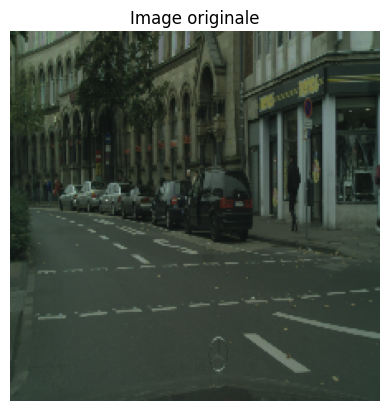

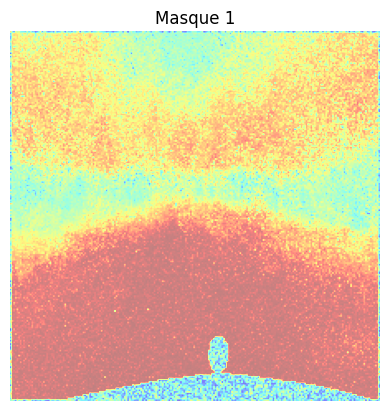

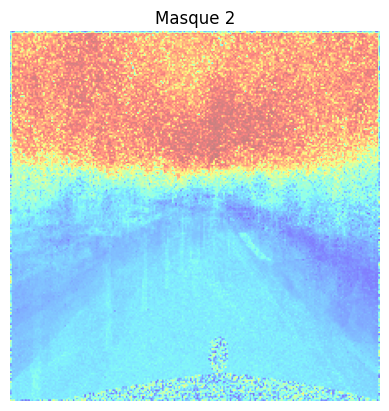

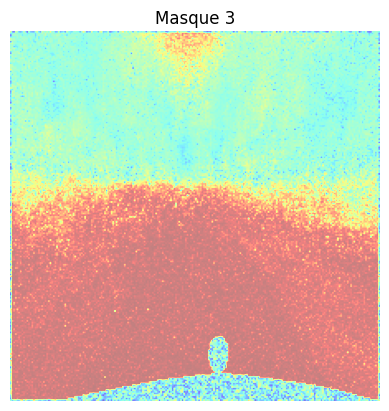

In [25]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Charger l'image de test que vous souhaitez segmenter
new_image = image.load_img(
    "../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000100_000019_leftImg8bit.png",
    target_size=(224, 224))

# Convertir l'image en tableau numpy
new_image_array = image.img_to_array(new_image)

# Ajouter une dimension supplémentaire pour le batch
new_image_batch = np.expand_dims(new_image_array, axis=0)

# Faire une prédiction sur l'image avec votre modèle
prediction = model.predict(new_image_batch)

# Afficher les résultats de la prédiction
plt.imshow(new_image)
plt.title('Image originale')
plt.axis('off')
plt.show()

# Afficher chaque masque de segmentation prédit
for i in range(prediction.shape[-1]):
    plt.imshow(prediction[0, :, :, i], cmap='jet', alpha=0.5)  # Utilisez un colormap approprié pour afficher les masques de différentes couleurs
    plt.title(f'Masque {i+1}')
    plt.axis('off')
    plt.show()


In [26]:
prediction

array([[[[0.7608052 , 0.45861056, 0.6912514 ],
         [0.48902163, 0.2534443 , 0.36886948],
         [0.3523611 , 0.3270207 , 0.281242  ],
         ...,
         [0.39910102, 0.27960122, 0.5643245 ],
         [0.5405506 , 0.2787478 , 0.5538643 ],
         [0.45149162, 0.5654427 , 0.50405705]],

        [[0.43278423, 0.5832919 , 0.48025867],
         [0.70779824, 0.77715915, 0.49346206],
         [0.7528046 , 0.8719579 , 0.56477684],
         ...,
         [0.78506064, 0.8895579 , 0.5821991 ],
         [0.7442312 , 0.8021969 , 0.5241632 ],
         [0.5703314 , 0.61843145, 0.35181147]],

        [[0.48765165, 0.44277212, 0.2818557 ],
         [0.737592  , 0.86423486, 0.5678206 ],
         [0.7957423 , 0.9215532 , 0.58431166],
         ...,
         [0.7626321 , 0.86704427, 0.55228084],
         [0.70284176, 0.7603054 , 0.5229758 ],
         [0.60087585, 0.51364106, 0.419444  ]],

        ...,

        [[0.5892618 , 0.5938785 , 0.43543574],
         [0.9740675 , 0.46197522, 0.9781402 ]